# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs4/20250309_sparc4acs4_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs4/20250309_s4c4_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs4/20250309_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs4/20250309_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs4/20250309_s4c4_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:10:48.013000,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:10:56.017498,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:11:06.549000,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,2,L2,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:11:14.553498,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,2,L2,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:11:25.151000,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,3,L2,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:17.603827,0.3,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,16,L4,None,True
1348,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:19.023890,0.3,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,16,L4,None,True
1349,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:20.443953,0.3,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,16,L4,None,True
1350,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:21.864016,0.3,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,16,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs4/20250309_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   70R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   70R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   70R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   70R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   70R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

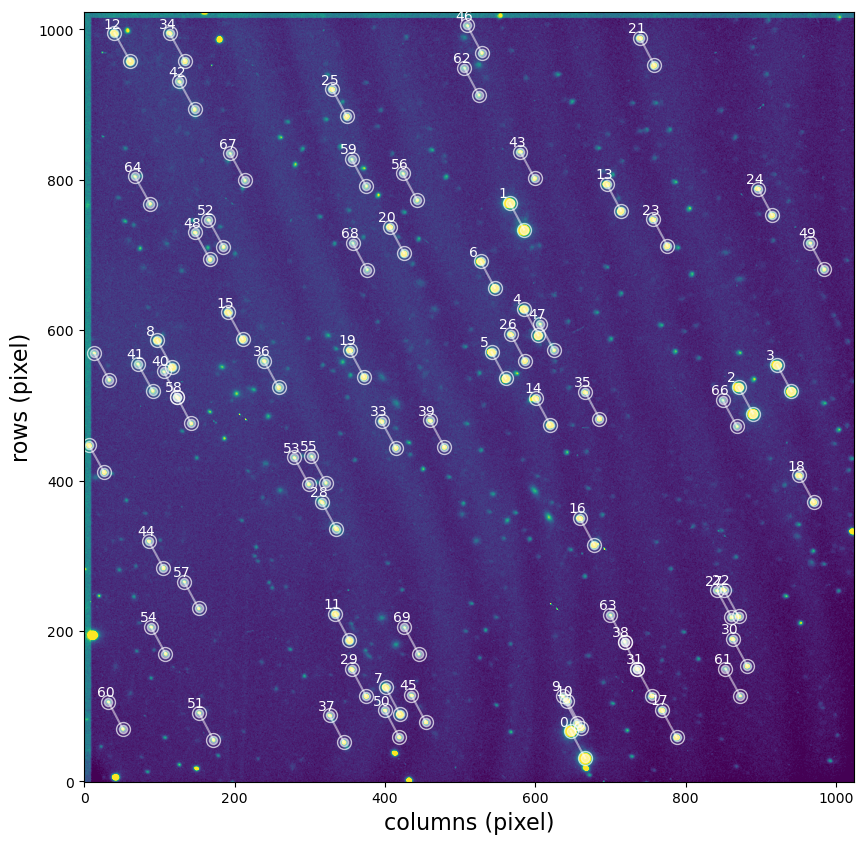

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553043,-38.759801,666.240112,30.843921,4.623327,4.623327,-10.315019,0.001226,-9.782123,0.000423,10,0
1,1,189.564734,-38.693939,584.931338,733.820492,5.390500,5.390500,-9.819302,0.001720,-9.795513,0.000419,10,0
2,2,189.527373,-38.716338,889.438306,489.140407,5.359307,5.359307,-9.486529,0.002195,-9.791384,0.000448,10,0
3,3,189.521306,-38.713450,940.560506,518.685037,5.381259,5.381259,-9.283052,0.002580,-9.792134,0.000497,10,0
4,4,189.562040,-38.707161,604.019447,592.996434,5.275176,5.275176,-8.490137,0.004882,-9.797530,0.000510,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,65,189.630820,-38.713779,33.017197,534.188213,3.639858,3.639858,-6.254461,0.033981,-9.802317,0.000412,10,0
66,66,189.529915,-38.717973,868.022415,472.156221,5.031041,5.031041,-5.328063,0.079273,-9.792642,0.000443,10,0
67,67,189.609744,-38.688466,213.599222,799.317421,4.642160,4.642160,-5.232005,0.086786,-9.803141,0.000433,10,0
68,68,189.589775,-38.699358,376.145660,680.631652,4.793066,4.793066,-5.121577,0.096508,-9.802688,0.000453,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

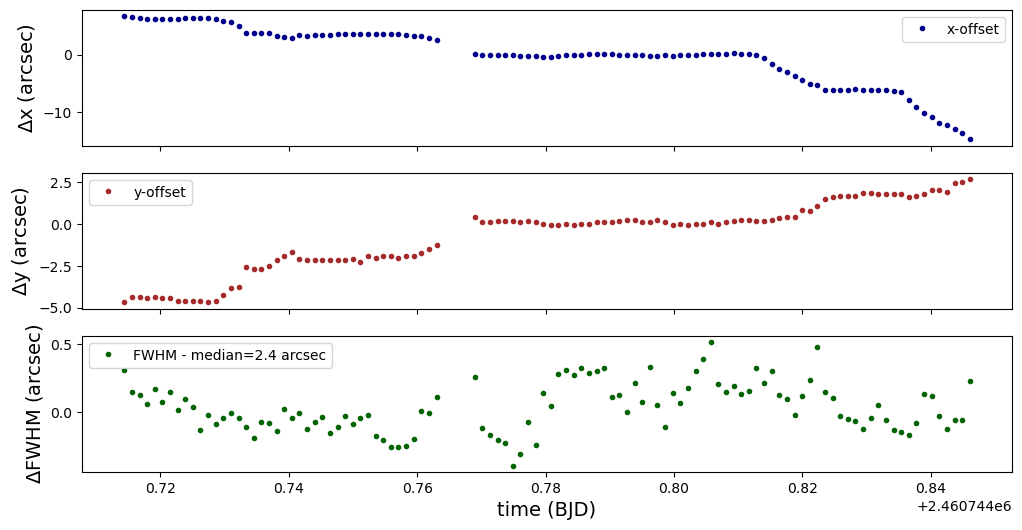

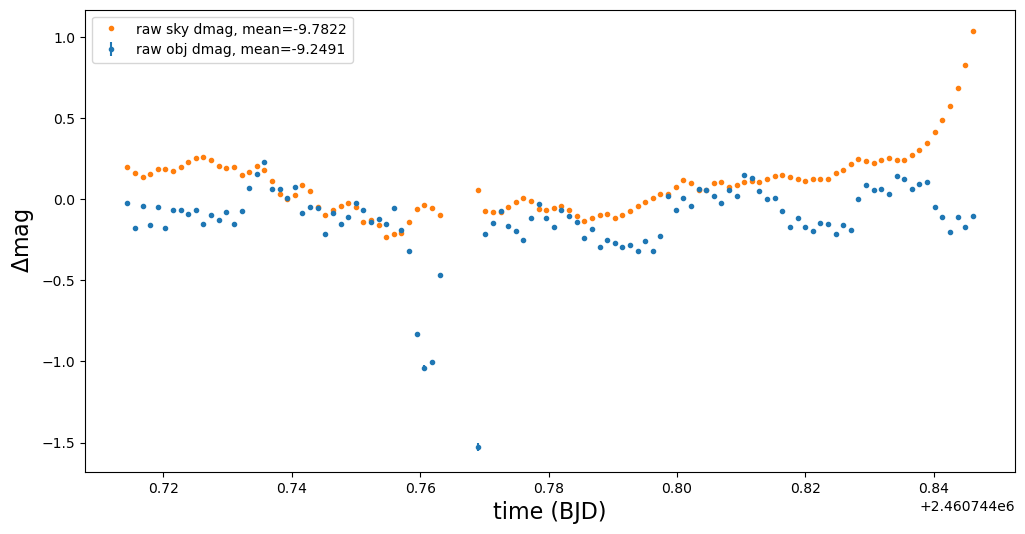

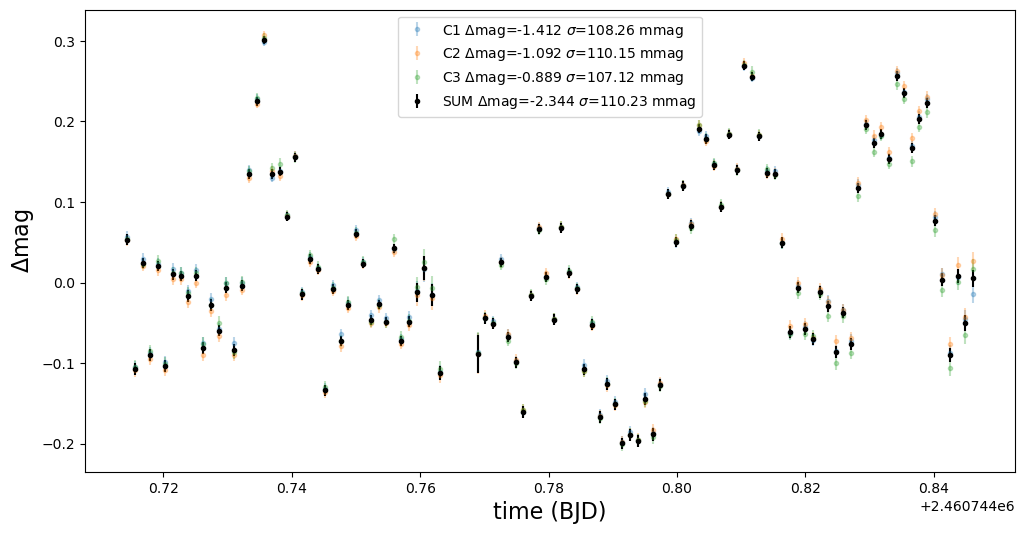

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
2460744.7143804086 551.2653553372991 ...   0.05338682950821205
2460744.7155657234 550.5153553372991 ...  -0.10739495102469387
2460744.7167513627 550.2653553372991 ...   0.02395500077053203
2460744.7179385875 549.7653553372991 ...  -0.09015978441819161
2460744.7191239605 549.7653553372991 ...   0.02048426991319463
 2460744.720311486 549.5153553372991 ...  -0.10326537413701065
2460744.7214967436 549.5153553372991 ...  0.010401062591724575
               ...               ... ...                   ...
  2460744.83894581 500.5153553372991 ...   0.22319716378771748
 2460744.840133324 498.7653553372991 ...   0.07695265737705537
 2460744.841318615 495.7653553372991 ... 0.0036890579925641376
 2460744.842503952 494.2653553372991 ...  -0.08995439494383728
  2460744.84368915 492.5153553372991 ...   0.00839851372793543
2460744.8448790824 490.5153553372991 ...   -0.050653143

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=5
comps=[1,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs4/20250309_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     675   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU    946   70R x 467C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0105', 'EFE0105', 'FO0106', 'EFO0106', 'FE0106', 'EFE0106', 'FO0107',
       'EFO0107', 'FE0107', 'EFE0107'],
      dtype='object', length=467)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 01:04:35,184 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 01:04:35,184 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 01:04:35,195 root - INFO - Source index: i=5   [pipeline_lib]


2025-09-18 01:04:35,195 | INFO | Source index: i=5 


2025-09-18 01:04:35,196 root - INFO - Source RA=189.56710898320236 Dec=-38.71263181838798 mag=-14.1412+-0.0004  [pipeline_lib]


2025-09-18 01:04:35,196 | INFO | Source RA=189.56710898320236 Dec=-38.71263181838798 mag=-14.1412+-0.0004


2025-09-18 01:04:35,197 root - INFO - Best aperture radius: 5.0 pixels  [pipeline_lib]


2025-09-18 01:04:35,197 | INFO | Best aperture radius: 5.0 pixels


2025-09-18 01:04:35,198 root - INFO - Polarization in Q: 0.001+-0.001  [pipeline_lib]


2025-09-18 01:04:35,198 | INFO | Polarization in Q: 0.001+-0.001


2025-09-18 01:04:35,198 root - INFO - Polarization in U: -0.003+-0.002  [pipeline_lib]


2025-09-18 01:04:35,198 | INFO | Polarization in U: -0.003+-0.002


2025-09-18 01:04:35,199 root - INFO - Polarization in V: -0.0006+-0.0008  [pipeline_lib]


2025-09-18 01:04:35,199 | INFO | Polarization in V: -0.0006+-0.0008


2025-09-18 01:04:35,200 root - INFO - Total linear polarization p: 0.003+-0.002  [pipeline_lib]


2025-09-18 01:04:35,200 | INFO | Total linear polarization p: 0.003+-0.002


2025-09-18 01:04:35,201 root - INFO - Angle of polarization theta: 150+-10 deg  [pipeline_lib]


2025-09-18 01:04:35,201 | INFO | Angle of polarization theta: 150+-10 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 01:04:35,202 root - INFO - Free constant k: 0.7995679056563901+-0.0  [pipeline_lib]


2025-09-18 01:04:35,202 | INFO | Free constant k: 0.7995679056563901+-0.0


2025-09-18 01:04:35,204 root - INFO - Zero of polarization: 30.2+-0.0  [pipeline_lib]


2025-09-18 01:04:35,204 | INFO | Zero of polarization: 30.2+-0.0


2025-09-18 01:04:35,205 root - INFO - RMS of zi residuals: 0.006409994746795103  [pipeline_lib]


2025-09-18 01:04:35,205 | INFO | RMS of zi residuals: 0.006409994746795103


2025-09-18 01:04:35,206 root - INFO - Reduced chi-square (n=108.0, DOF=105.0): 2.49  [pipeline_lib]


2025-09-18 01:04:35,206 | INFO | Reduced chi-square (n=108.0, DOF=105.0): 2.49


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 01:04:35,293 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:04:35,293 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:04:35,298 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:04:35,298 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:04:35,514 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:04:35,514 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:04:35,519 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:04:35,519 | INFO | Substituting symbol \perp from STIXGeneral


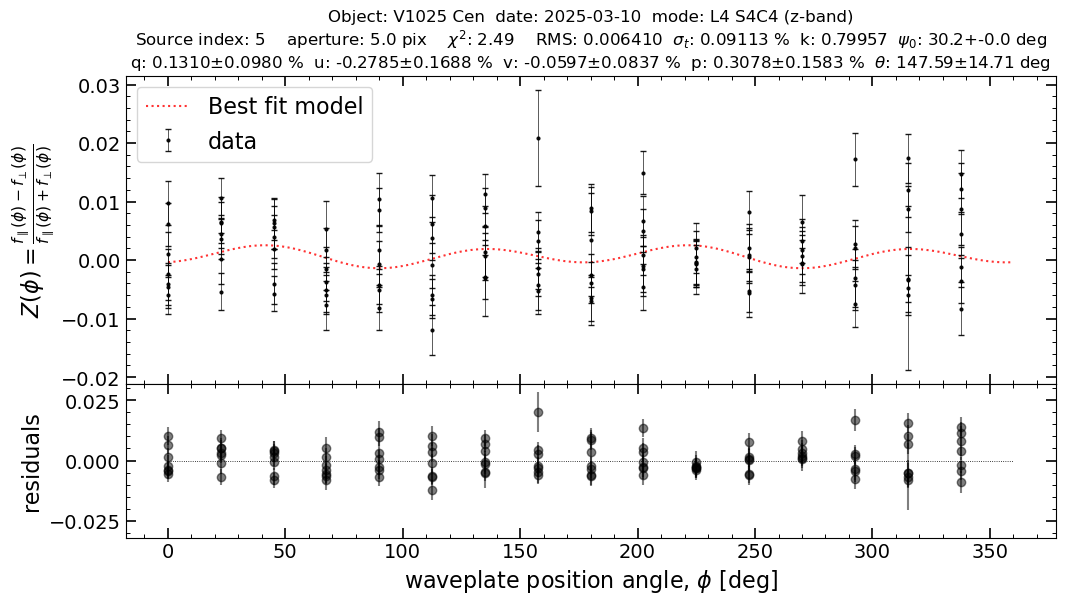

In [11]:
source_index = 5

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs4/20250309_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 5
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 1
APERTURE_RADIUS : 5.0
NEXPS : 108
MAG : -14.1412+-0.0004
RA : 189.56710898320236
DEC : -38.71263181838798
FWHM : 5.05885462680506
X1 : 541.829167301038
Y1 : 570.8986276930983
X2 : 560.7015433735603
Y2 : 535.7761666251125
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.3+-0.2 %  Angle of polarization: 150+-10 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

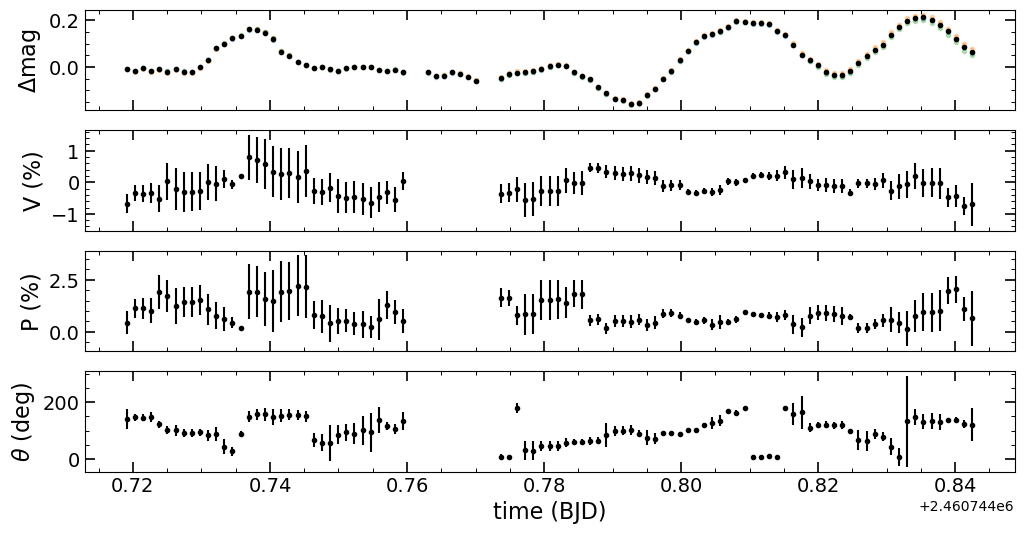

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.010173614126127717,0.00250509952317399,-0.010952492457521501,0.00257304943618494,-0.00967534499284639,0.002649374382708893,2460744.7191099254,541.829167301038,570.8986276930983,560.7015433735603,535.7761666251125,5.300029418110398,-11.513779123437855,0.002407111860683971,-13.87959329696914,0.0015914550299257503,-0.010337283831050925,0.004502741526184535,0.005639777837768002,140.8135958503407,35.82209754261485
-0.018943132775904203,0.0025285386524253567,-0.020782447293983708,0.0025955765625634937,-0.01835354462404304,0.0026722709088293295,2460744.7202952174,541.079167301038,571.8986276930983,559.9515433735603,536.7761666251125,5.2296708501998275,-11.504681359731077,0.002431105133668027,-13.879577239125464,0.0015939701083371625,-0.019418989694152344,0.011301480178120727,0.004741200202670383,147.1194906181956,11.998280195092198
-0.00419996146199253,0.002510265406370845,-0.00747503150807205,0.0025780780096927173,-0.004133728705705053,0.0026564357748731613,2460744.7214811514,540.829167301038,571.8986276930983,559.7015433735603,536.7761666251125,5.202734528445305,-11.51832813348889,0.0024111181763479695,-13.879072728599924,0.0016012798255029142,-0.0052677054107999055,0.011296576816188689,0.004900881320112724,145.6277624939607,12.407759273973912
-0.017293924059433863,0.0025556174565828024,-0.021284351499245346,0.002622790430235022,-0.01658971914481633,0.0027011655987493393,2460744.722668116,540.329167301038,571.6486276930983,559.2015433735603,536.5261666251125,5.143586966297311,-11.504349042438648,0.0024567706724866064,-13.878248149482026,0.0016122466950250392,-0.018422217343143643,0.010269139105411745,0.005886060009937934,147.84829620177675,16.392933677907873
-0.009093766189764096,0.002551748042644253,-0.014054120103415002,0.002619519051938779,-0.009559529015096047,0.002699099490179975,2460744.723853408,540.329167301038,571.8986276930983,559.2015433735603,536.7761666251125,5.124262772377753,-11.51216946045394,0.002451888819943938,-13.87848157338485,0.0016196171888445076,-0.010835223230674984,0.01934984881361696,0.008144033845533622,121.61597179325699,12.037270690112605
-0.01941851053258148,0.0025775030572557393,-0.024262536321117523,0.002644769923679573,-0.019217023266284272,0.002723929017919055,2460744.725039863,540.079167301038,571.6486276930983,558.9515433735603,536.5261666251125,5.026094538712846,-11.50175432313892,0.0024786300453737867,-13.878180152663997,0.0016208943668651649,-0.020948939824842583,0.017153514863265416,0.007703875214630677,101.93797804463752,12.844646295219654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.2095682703796431,0.0022751837911205086,0.22319271234889904,0.0023669598485233545,0.19976324437690351,0.002447640523852935,2460744.8353713714,503.07916730103796,590.3986276930983,521.9515433735603,555.2761666251125,4.871572167001634,-11.691891535633264,0.0021487262595940486,-13.836132986599711,0.0017084585818506607,0.21123543873378736,0.009462666167721989,0.009052951126892103,131.427124194663,27.361675625025708
0.1984730959132861,0.0023247387277978687,0.21189465590530254,0.002416769335281036,0.18843493302304815,0.0024972362123820003,2460744.8365577916,503.07916730103796,590.1486276930983,521.9515433735603,555.0261666251125,4.871572167001634,-11.679440184671758,0.0021985305469815705,-13.834901899699934,0.0017264886836804755,0.20001517467205865,0.009356844372259008,0.00936388497943281,132.23559068568557,28.621520221685824


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=5, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)